# Exercise 1
Laboratory Session 06 : May 19, 2022 Exercises due : June 5, 2022  

• a well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.  
• A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.  
  
(a) what is the probability distribution of y, the number of times the new method fails to detect the disease ?  

_**ANS: The distribution of y follows a Binomial Distribution, this is because it is a binary sucess or failure problem that has a fixed probability of success**_
  
(b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?  

_**ANS: The frequentists method only uses the newly aquired data. Thus the new failure probability is 6/75 = 8%**_
  
(c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance  

_**To find the alpha and beta parameter of the beta function the mean and variance is placed into these equations.**_

\begin{array}{l}
\alpha=\left(\frac{E[X](1-E[X])}{V[X]}-1\right) E[X] \\
\beta=\left(\frac{E[X](1-E[X])}{V[X]}-1\right)(1-E[X])
\end{array}

(d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.  
  
(e) Perform the same hypothesis test in the classical frequentist way.  


 The area under the posterior should be 1, it is:  1
Expectation is:  0.08478674
Variance is:  0.1359845

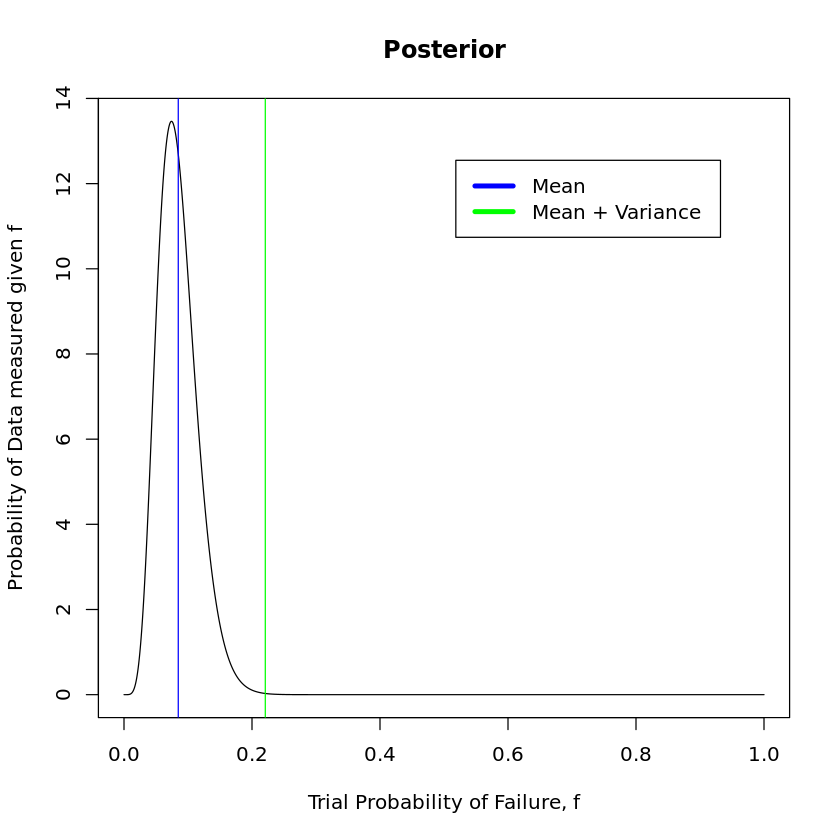

In [142]:
#part c

#P(f)
prior <- function(f){
    mean <- 0.15
    var <- 0.14^2
    alpha <- mean*mean*(1-mean)/var  -  mean
    beta <- mean*(1-mean)*(1-mean)/var  -  (1-mean)
    return(dbeta(f,shape1 = alpha, shape2 = beta))
}
data <- 6
#P(data|f)
likelihood <- function(f){
    dbinom(data,size = 75,prob = f)
}

liXpr <- function(f){
    return(prior(f)*likelihood(f))
}

normC <- integrate(liXpr, lower = 0, upper = 1)

# f is failure probability 
#P(f|data)
posterior <- function(f){
    return((1/normC$value)*prior(f)*likelihood(f))
}

one <- integrate(posterior, lower = 0, upper = 1)
cat('\n The area under the posterior should be 1, it is: ',one$value)

f <- seq(0,1,0.0001)
fPf = function(f){
    return(f*posterior(f))
}

fPf2 <- function(f){
    return(f^2*posterior(f^2))
}

Expf <- integrate(fPf,lower = 0, upper = 1)$value
var <- abs(Expf^2 - integrate(fPf2,lower = 0, upper = 1)$value)

cat('\nExpectation is: ',Expf)
cat('\nVariance is: ',var)
plot(f,posterior(f),type = 'l',main = 'Posterior', xlab = 'Trial Probability of Failure, f',ylab = 'Probability of Data measured given f')
abline(v = Expf, col = 'blue')
abline(v = Expf + var, col = 'green')
legend("topright", 
       inset=0.1, 
       legend=c("Mean","Mean + Variance"),
       col=c("Blue", "Green"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)


# d hypothesis test
part d Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

#### H1 hypothesis. The new treatment is better than the traditional treatment. ie probability of failure to detect the desease in ill patients is less than 15%.

#### H0 null hypothesis. The new treatment is not better than the traditional treatment. ie probability of failure to detect the desease in ill patients is >= 15%

this is a single sided hypothesis test

f is the probability of failing to detect the disease in ill patients. 

# bayseian test
In a bayseian hypothesis test the posterior probability of the null hypothesis is used. This is the probability the null hypothesis is true given the data.

$$P(H0|data) = P(f\ge0.15 | data) = \int_{0.15}^{1} P(f|data)df$$

$$P(f|data) = \frac{P(data|f) \cdot prior(f)}{normC}$$

$P(f|data)$ is the posterior calculated previously using a beta prior. The posterior of the null hypothesis is this an integral of this from 0.15 to 1.




In [143]:
PH0gD = integrate(posterior, lower = 0.15, upper = 1)$value

cat('\nThe probability that the null hypothesis is true given the data is, ',PH0gD)
cat('\nThis is less than 5%. Thus we reject the null hypotheses given a 5% confidance level.')


The probability that the null hypothesis is true given the data is,  0.03127933
This is less than 5%. Thus we reject the null hypotheses given a 5% confidance level.

# frequentist f-test

In the f-test we are interested in the null distribution. This the the distribution of the test stastic given the null hypothesis is true. If the data meaured is in the rejection region, 5% of the area of the distribution. Then the null hypothesis is rejected.

H0 null hypothesis, $f \ge 0.15$.  
fails <- 0:75 
$$\int_0^r dbinom(x = fails, size = 75, prob = 0.15) dx = 0.05$$
$$If data < r then we reject the null hypothesis. It is because the data is so far into the tails that it is unlikely the data is sampled from the distribution and thus it is unlikely the probability of failure is 0.15$$

We only use prob = 0.15 because this gives the greatest chance of accepting the null hypothesis. If we accept this null hypothesis then it is also accepted for all values of prob > 0.15.



 [1] 5.086504e-06 7.240789e-05 5.119769e-04 2.399538e-03 8.395320e-03
 [6] 2.342005e-02 5.435330e-02 1.081616e-01 1.888740e-01 2.949079e-01
[11] 4.184063e-01 5.471880e-01 6.683943e-01 7.720504e-01 8.530589e-01
[16] 9.111945e-01 9.496665e-01 9.732290e-01 9.866273e-01 9.937205e-01
[21] 9.972253e-01 9.988452e-01 9.995469e-01 9.998322e-01 9.999413e-01
[26] 9.999806e-01 9.999939e-01 9.999982e-01 9.999995e-01 9.999999e-01
[31] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
[36] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
[41] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
[46] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
[51] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
[56] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
[61] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
[66] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
[71] 1.000000e+00 1.

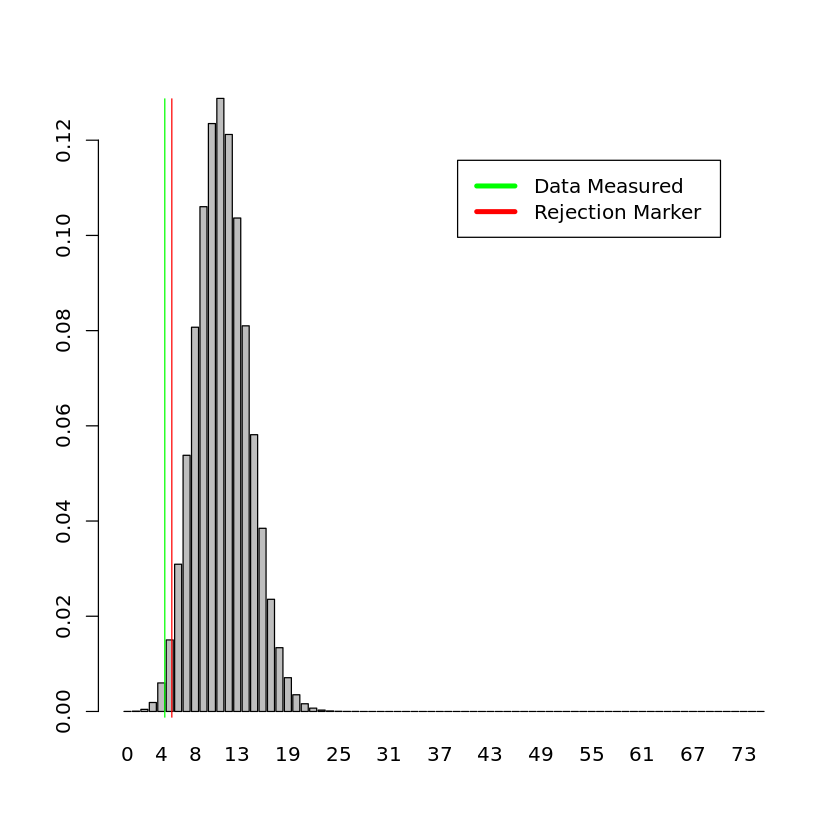

In [157]:
nullDist <- function(f){
    return (dbinom(f,size = 75, prob = 0.15))
}
f <- 0:75
nullDistV <- nullDist(f) 
nullcumsum <- cumsum(nullDistV)
accept1 <- which.min(abs(0.05-nullcumsum))
barplot(nullDistV,names = f)
legend("topright", 
       inset=0.1, 
       legend=c("Data Measured","Rejection Marker, 5% of area"),
       col=c("green", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)
abline(v = accept1,col = 'red')
abline(v = 6, col = 'green')
print(accept1)
print(accept2)


cat('The data measured is before the rejection marker. Thus we reject the null hypothesis. It is unlikely the data was sampled from this distribution.')

## The bayseian and frequentist approach disagree. 😱

# Exercise 2
• Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.  

• Considering the following to sets of observations taken over a fixed large time interval in two different corps:  

y death soldiers 0 1 2 3 4 ≥ 5 n1 observations 109 65 22 3 1 0 n2 observations 144 91 32 11 2 0
  
(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.  

 (b) assuming now a Jeffreys’ prior,
√
g(λ)∝1/ λ,withλ>0
compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.


 The normalisation constant is:  4.525902e-228
The posterior should have an area undernieth of one, it is:  1.133875
I believe this is due to errors with small numbers being used that the computer struggles to represent.
The mean is:  0.7535547
The variance is:  0.1058469
The median is:  0.66
The 95% confidence interval goes from  0.593  to  0.706

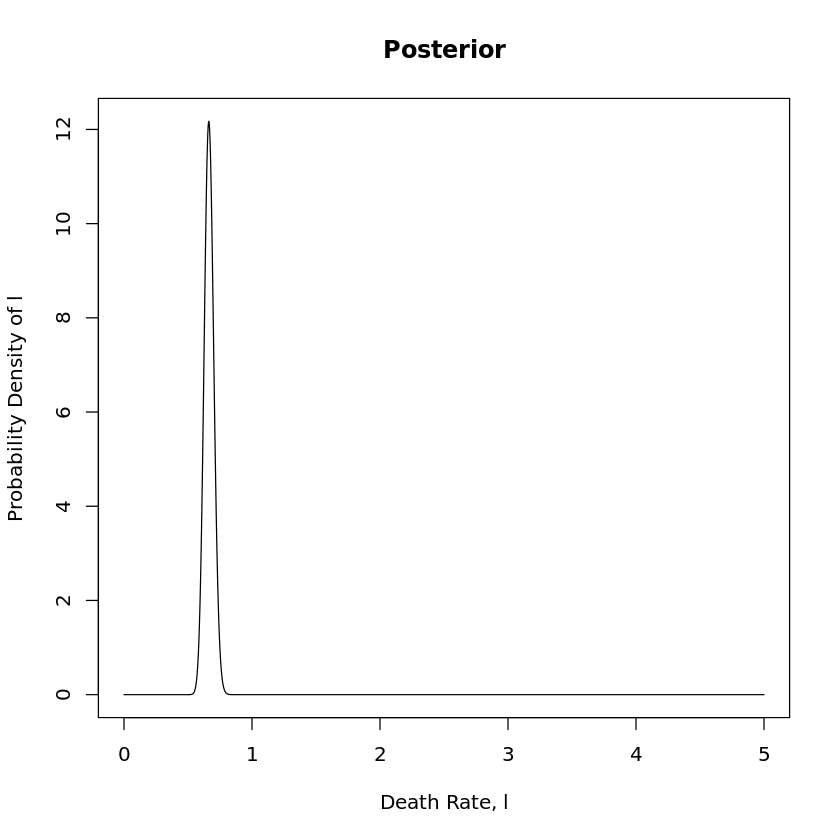

In [112]:
nDeath <- c(0,1,2,3,4,5)
corp1 <- c(109,65,22,3,1,0)
corp2 <- c(144,91,32,11,2,0)
data <- corp1 + corp2
# cat(total)
#uniform prior means the prior is taken into account in the normalisation constant

#P(data|l), where l is deathrate 
likelihood <- function(l){
    probData <- 1
    for(i in 1:6){
        probData <- probData * dpois(nDeath[i],lambda = l)^data[i]
    }
    return(probData)
}

l <- seq(0,5,0.001)
normC <- integrate(likelihood, lower = 0, upper = 5)$value
cat('\n The normalisation constant is: ',normC)

posterior <- function(l){
    normC^-1 * likelihood(l)
}

plot(l,posterior(l), type = 'l', main = 'Posterior', xlab = 'Death Rate, l',ylab = 'Probability Density of l')

cat('\nThe posterior should have an area undernieth of one, it is: ', integrate(posterior, lower = 0, upper = 5)$value)
cat('\nI believe this is due to errors with small numbers being used that the computer struggles to represent.')

lPl <- function(l){
    return(l*posterior(l))
}

l2Pl2 <- function(l){
    return(l^2*posterior(l^2))
}

quantile <- function(q,fun){
    area <- 0
    deathrate <- 0.001
    while(area < q){
        area <- integrate(fun,lower = 0, upper = deathrate)$value
        deathrate <- deathrate + 0.001
    }
    return(deathrate)
}

mean <- integrate(lPl, lower = 0, upper = 5)$value
cat('\nThe mean is: ',mean)

var <- abs(mean^2 - integrate(l2Pl2,lower = 0, upper = 5)$value)
cat('\nThe variance is: ',var)

median <- quantile(0.5,posterior)
cat('\nThe median is: ', median)

lc <- quantile(0.025,posterior)
uc <- quantile(0.975,posterior)
cat('\nThe 95% confidence interval goes from ',lc,' to ',uc)






 The normalisation constant is:  9.068347e-228
The posterior should have an area undernieth of one, it is:  1.293417
I believe this is due to errors with small numbers being used that the computer struggles to represent.
The mean is:  0.8541939
The variance is:  0.2043003
The median is:  0.651
The 95% confidence interval goes from  0.588  to  0.687

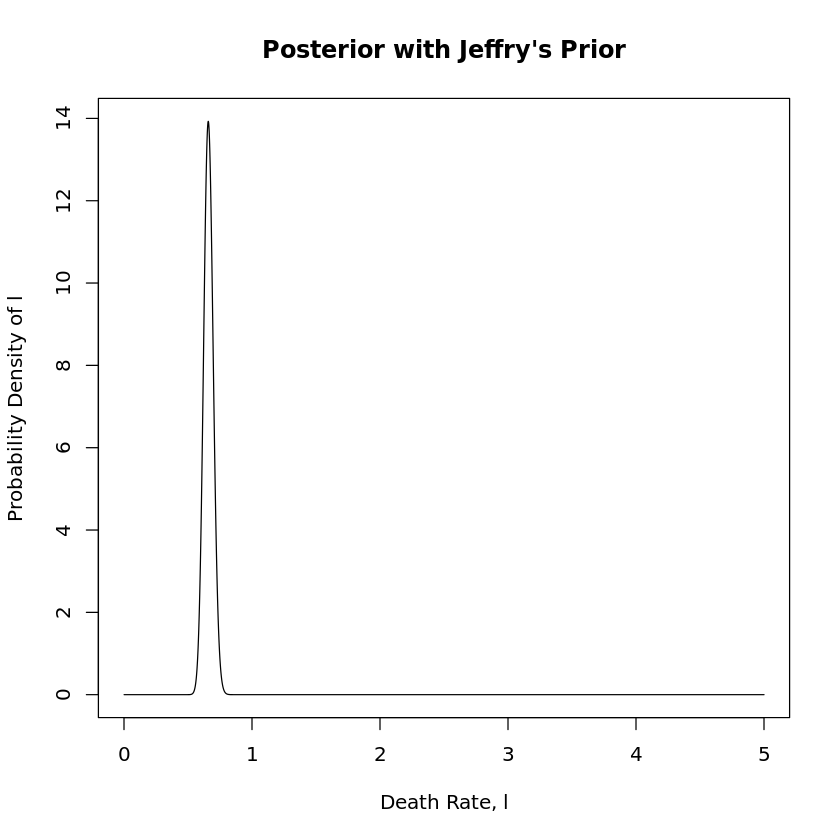

In [89]:
#with jeffories prior
jeff <- function(l){
    return(1/(l^2))
}

nDeath <- c(0,1,2,3,4,5)
corp1 <- c(109,65,22,3,1,0)
corp2 <- c(144,91,32,11,2,0)
data <- corp1 + corp2
# cat(total)
#uniform prior means the prior is taken into account in the normalisation constant

#P(data|l), where l is deathrate 
likelihoodjeff <- function(l){
    probData <- 1
    for(i in 1:6){
        probData <- probData * dpois(nDeath[i],lambda = l)^data[i]
    }
    return(jeff(l)*probData)
}

l <- seq(0,5,0.001)
normC <- integrate(likelihoodjeff, lower = 0, upper = 5)$value
cat('\n The normalisation constant is: ',normC)

posteriorjeff <- function(l){
    normC^-1 * likelihoodjeff(l)
}

plot(l,posteriorjeff(l), type = 'l', main = "Posterior with Jeffry's Prior", xlab = 'Death Rate, l',ylab = 'Probability Density of l')

cat('\nThe posterior should have an area undernieth of one, it is: ', integrate(posteriorjeff, lower = 0, upper = 5)$value)
cat('\nI believe this is due to errors with small numbers being used that the computer struggles to represent.')

lPl <- function(l){
    return(l*posteriorjeff(l))
}

l2Pl2 <- function(l){
    return(l^2*posteriorjeff(l^2))
}

quantile <- function(q,fun){
    area <- 0
    deathrate <- 0.001
    while(area < q){
        area <- integrate(fun,lower = 0, upper = deathrate)$value
        deathrate <- deathrate + 0.001
    }
    return(deathrate)
}

mean <- integrate(lPl, lower = 0, upper = 5)$value
cat('\nThe mean is: ',mean)

var <- abs(mean^2 - integrate(l2Pl2,lower = 0, upper = 5)$value)
cat('\nThe variance is: ',var)

median <- quantile(0.5,posteriorjeff)
cat('\nThe median is: ', median)

lc <- quantile(0.025,posteriorjeff)
uc <- quantile(0.975,posteriorjeff)
cat('\nThe 95% confidence interval goes from ',lc,' to ',uc)

# Exercise 3
• A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.  

• indicating with p the probability that a sample of water taken from the stream has a high bacter X level,  

(a) find the frequentist estimator for p

The frequentist estimation of p is, 11/116 = 0.094

(b) using a Beta(1,10) prior for p, calculate and posterior distribution P(p 􏰀􏰀 y)  

(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval  

(d) test the hypotesis  

$$H◦ : p=0.1$$
$$H_1 :p \ne 0.1$$  
at 5% level of significance with both the frequentist and bayesian approach  

• a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level  
(e) find the frequentist estimator for p  
(f) find a bayesian estimator for p, assuming both a Beta(1,10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.  

(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval 

(h) test the hypotesis  
$$H◦ : p=0.1$$
$$H_1 :p \ne 0.1$$  

at 5% level of significance with both the frequentist and bayesian approach  


 The area under the posterior should be 1, it is:  1
Expectation is:  0.09448819
Variance is:  0.1433242
The bayseian estimation of f is,  0.088 . This is based on the value of f that gives the max likelihood.
The 95% confidence interval goes from  0.052  to  0.152

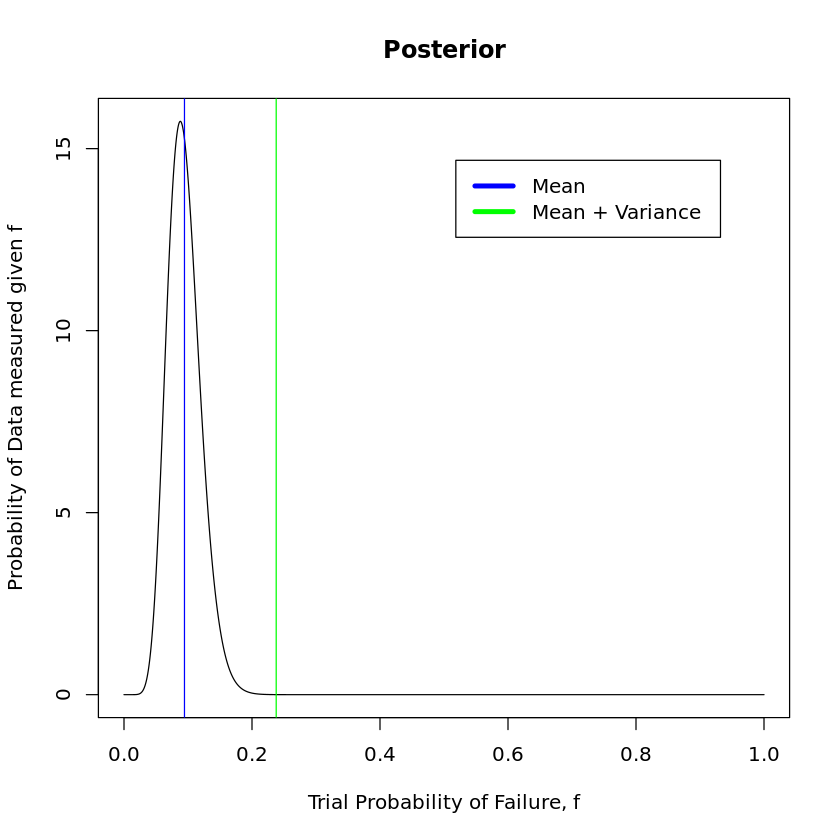

In [122]:
#part c
# f is the probability of a high bacteria level
#P(f)
prior <- function(f){
    return(dbeta(f,shape1 = 1, shape2 = 10))
}
data <- 11
#P(data|f)
likelihood <- function(f){
    dbinom(data,size = 116,prob = f)
}

liXpr <- function(f){
    return(prior(f)*likelihood(f))
}

normC <- integrate(liXpr, lower = 0, upper = 1)

# f is failure probability 
#P(f|data)
posterior <- function(f){
    return((1/normC$value)*prior(f)*likelihood(f))
}

one <- integrate(posterior, lower = 0, upper = 1)
cat('\n The area under the posterior should be 1, it is: ',one$value)

f <- seq(0,1,0.0001)
fPf = function(f){
    return(f*posterior(f))
}

fPf2 <- function(f){
    return(f^2*posterior(f^2))
}

Expf <- integrate(fPf,lower = 0, upper = 1)$value
var <- abs(Expf^2 - integrate(fPf2,lower = 0, upper = 1)$value)

cat('\nExpectation is: ',Expf)
cat('\nVariance is: ',var)
plot(f,posterior(f),type = 'l',main = 'Posterior', xlab = 'Trial Probability of Failure, f',ylab = 'Probability of Data measured given f')
abline(v = Expf, col = 'blue')
abline(v = Expf + var, col = 'green')
legend("topright", 
       inset=0.1, 
       legend=c("Mean","Mean + Variance"),
       col=c("Blue", "Green"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)

posteriorV <- posterior(f)
cat('\nThe bayseian estimation of f is, ', f[which.max(posteriorV)],'. This is based on the value of f that gives the max likelihood.')

lc <- quantile(0.025,posterior)
uc <- quantile(0.975,posterior)
cat('\nThe 95% confidence interval goes from ',lc,' to ',uc)

# hypothesis testing
(d) test the hypotesis  

$$H◦ : p=0.1$$
$$H_1 :p \ne 0.1$$  
at 5% level of significance with both the frequentist and bayesian approach  

### frequentist approach, f-test
In the frequentist approach we use the null distribution. This is the sampling distribution given the null hypothesis is true. In this case it is a binomial distribution with a probability = 0.1 and size = 116.

If the data collected is unlikely to have been sampled from this distribution then we reject the null hypothesis. It is said to be unlikely if it resides deep into the tails of the distribution. A significance of 5% means each reject tail has 5% of the area of the distribution.


The lower acceptance line is at 7 samples. This has a true area before of:  0.04840562
The upper acceptance line is at 18 samples. This has a true area after of:  0.04005376
The data measured is within the rejection markers. Thus we accept the null hypothesis. It is likely the data was sampled from this distribution.

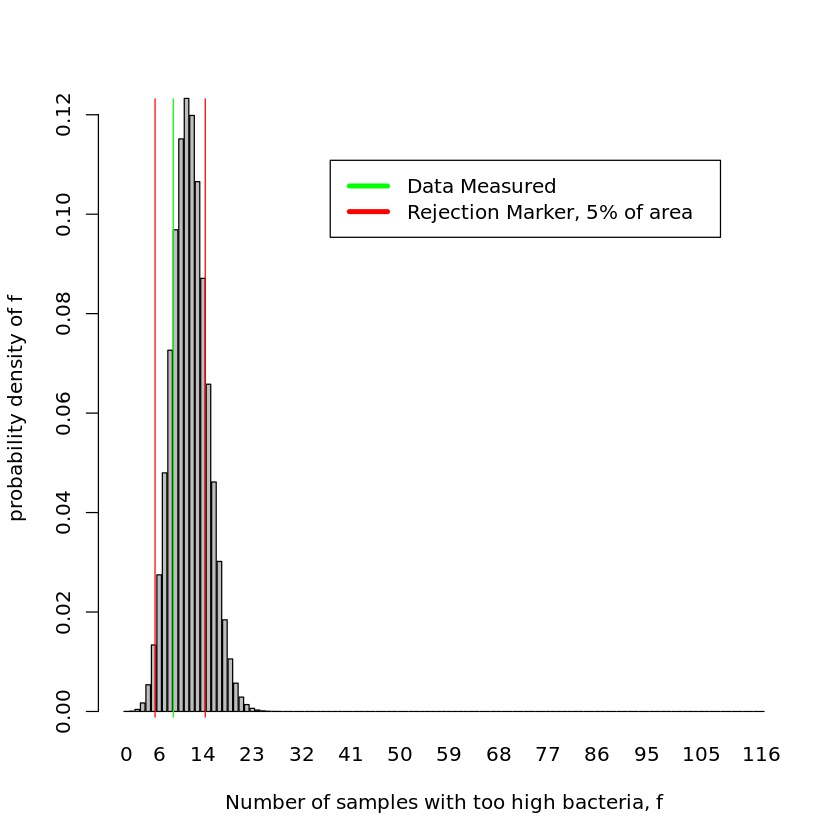

In [8]:
# nullDist <- function(x){
#     return(dbinom(x,size = 116,prob = 0.1))
# }
# x <- 0:116
# nullDistV <- nullDist(x)
# cumsumNull <- cumsum(nullDistV)
# print(cumsumNull)
# accept1 = cumsumNull[trunc(116*0.05)]
# accept2 = cumsumNull[95]
# barplot(nullDist(x),names = x)
# abline(v=accept1)
# abline(v=accept2)

# print(accept1)
# print(accept2)

nullDist <- function(f){
    return (dbinom(f,size = 116, prob = 0.1))
}
f <- 0:116
nullDistV <- nullDist(f) 
nullcumsum <- cumsum(nullDistV)

accept1 <- which.min(abs(0.05-nullcumsum))
accept2 <- which.min(abs(0.95-nullcumsum))

barplot(nullDistV,names = f, xlab = 'Number of samples with too high bacteria, f',ylab = 'probability density of f')
legend("topright", 
       inset=0.1, 
       legend=c("Data Measured","Rejection Marker, 5% of area"),
       col=c("green", "red"), 
       lty=1:1, 
       cex=1,
       box.lty=1,
       lwd = 4)
abline(v = accept1,col = 'red')
abline(v = 11, col = 'green')
abline(v = accept2, col = 'red')
cat('\nThe lower acceptance line is at',accept1,'samples. This has a true area before of: ',nullcumsum[accept1])
cat('\nThe upper acceptance line is at',accept2,'samples. This has a true area after of: ',1-nullcumsum[accept2])

cat('\nThe data measured is within the rejection markers. Thus we accept the null hypothesis. It is likely the data was sampled from this distribution.')

In [129]:
?barplot
